### Introduction

As the project use case that need with statistics to find the logic of data, in fact, I have to say that during my previous model work, I do haven't done that so many times, but this is really important so that you could get a deeper insight of data.

But there are many techs should be considerred that we need to figure out. Let's move with code and explain.

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

x, y = load_iris(return_X_y = True)

df = pd.DataFrame(np.concatenate((x, y[:, np.newaxis]), axis=1), columns=list('abcd') +['label'])

df.head()

C:\Users\Public\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,a,b,c,d,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 假设检验

在做数据分析之前的第一步是对数据进行一个假设，我们可以通过对不同的假设进行验证，如果验证通过，则数据分布情况为我们假设。一般情况会做一个二分部的假设，一般H0为接受假设，H1则不接受假设。

###  正态检验


H0:服从正态分布

H1:不服从

检验是否为正态分布，p>0.05，不能拒绝原假设，符合正态分布，基于偏度和峰度的一种检验法

In [2]:
# check first column
ss.normaltest(df.a)

# we could focus with `pvalue`, as p > 0.05, accept data is normal

NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)

### 卡方检验

一般使用卡方检验进行分析的目的都是比较差异性，通常用在某个变量(或特征)值是不是和应变量有显著关系。

This is also great article:[结合日常生活的例子，了解什么是卡方检验](https://www.jianshu.com/p/807b2c2bfd9b)

In [8]:
# return is 4-tuple: chi2-value, p-value, freedom, expected frequency.
# so that we could conduct that `a` and `b` is significent different.
ss.chi2_contingency(df.a, df.b)

(0.0,
 1.0,
 0,
 array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]))

In [12]:
# let's try another
obs = np.array([[10, 10, 20], [20, 20, 20]])
ss.chi2_contingency(obs)

(2.7777777777777777, 0.24935220877729622, 2, array([[12., 12., 16.],
        [18., 18., 24.]]))

There is a great article to explain with chi2 in [python](https://blog.csdn.net/qq_38214903/article/details/82967812?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.nonecase)

In [31]:
kf_data = ss.chi2_contingency([[37,27], [39,21]])
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf_data)

chisq-statistic=0.4054, p-value=0.5243, df=1 expected_frep=[[39.22580645 24.77419355]
 [36.77419355 23.22580645]]


In [6]:
# we could also use sklearn to do the feature selection
# let's check with iris data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(chi2, k=2)
print('origin data: ', df.head())

# so that according to chi2, we need to select with 3th, 4th columns
model.fit_transform(df[list('abcd')], df.label)

C:\Users\Public\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Public\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


origin data:       a    b    c    d  label
0  5.1  3.5  1.4  0.2    0.0
1  4.9  3.0  1.4  0.2    0.0
2  4.7  3.2  1.3  0.2    0.0
3  4.6  3.1  1.5  0.2    0.0
4  5.0  3.6  1.4  0.2    0.0


C:\Users\Public\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
# let's get with model score(confidence) and p-value
print('score:', model.scores_)

# last two column p-value is smaller and confidence is larger.
print('pvalue: ', model.pvalues_)

score: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
pvalue:  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


## 异常值处理

异常值处理: 使用箱线图判断异常值，上下限替换	需从业务判断数据是正常异常还是异常异常


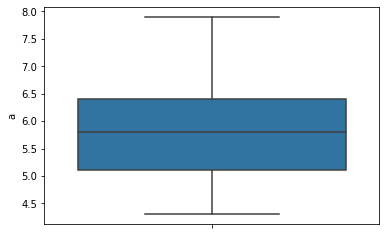

In [17]:
# box check with high level and low level, we could find some data point as abnormal:range(25quan - k * 25quan, 75quan + k * 75quan)
sns.boxplot(y=df.a)

In [25]:
# let check with abnormal data with quantile
data = df.a
quan_low = data.quantile(q=.25)
quan_high = data.quantile(q=.75)

# we could choose k from 1 ~ 2.5,what K means? if k is smaller, 容忍度小，更多点为异常值
k = 1.5
data_sati = data[data < quan_high + quan_high * k ][data > quan_low - quan_low * k]

print("original data:", len(data))
print('satisfied data:', len(data_sati))

original data: 150
satisfied data: 150
